In [31]:
import pandas as pd
import numpy as np  
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt  
%matplotlib inline

In [41]:
data = pd.read_csv("Iris.csv")
input=data.drop(['Species', 'Id'],axis="columns")
target=data['Species']
labelencoder = LabelEncoder()
target = labelencoder.fit_transform(target)

In [42]:
print(input)
print(target)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(input,target, 
                            test_size=0.2, random_state=0) 
print(X_train)
print(y_train)
print(X_test)
print(y_test)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
137            6.4           3.1            5.5           1.8
84             5.4           3.0            4.5           1.5
27             5.2           3.5            1.5           0.2
127            6.1           3.0            4.9           1.8
132            6.4           2.8            5.6           2.2
..             ...           ...            ...           ...
9              4.9           3.1            1.5           0.1
103            6.3           2.9            5.6           1.8
67             5.8           2.7            4.1           1.0
117            7.7           3.8            6.7           2.2
47             4.6           3.2            1.4           0.2

[120 rows x 4 columns]
[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 

In [44]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [45]:
# Fit the model in the Decision Tree classifier.

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [18]:
from sklearn import metrics
y_pred = classifier.predict(X_test)#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# ('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.9666666666666667


In [46]:
import csv
with open('Iris.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    dict_from_csv = dict(list(csv_reader)[0])
    list_of_column_names = list(dict_from_csv.keys())
list_of_column_names.remove('Id')
list_of_column_names.remove('Species')
print(len(list_of_column_names))

4


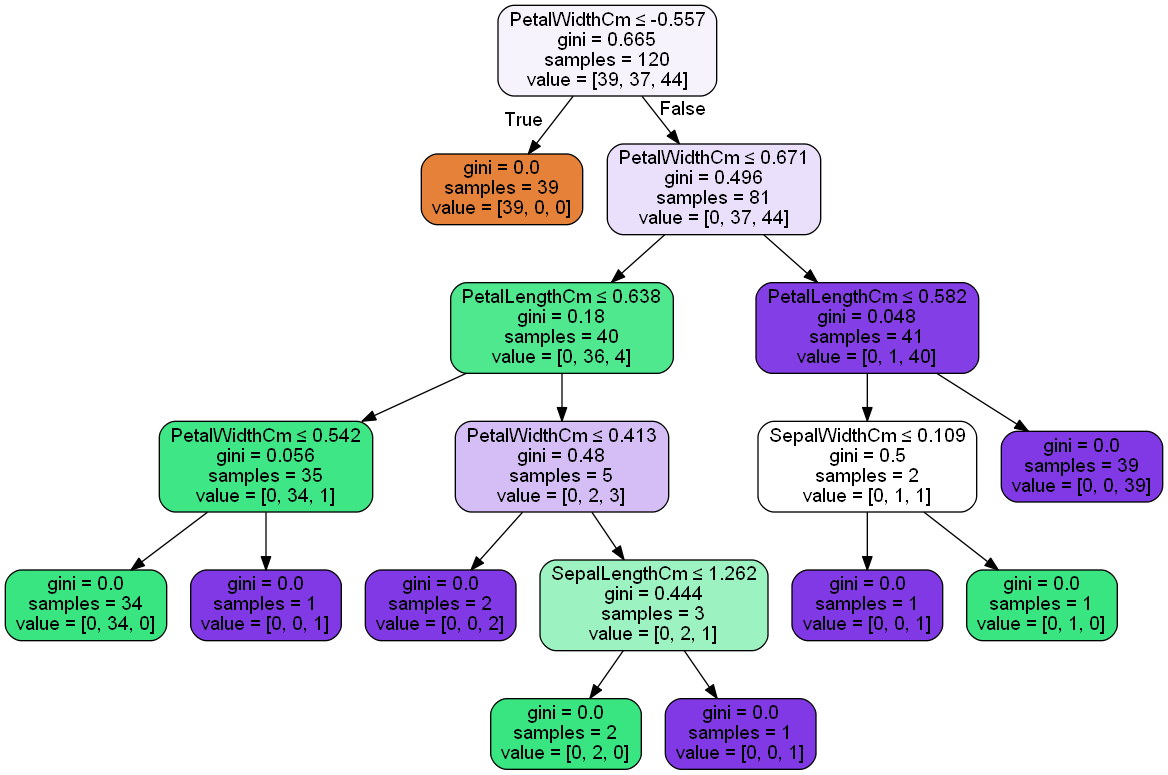

In [47]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=list_of_column_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())